In [26]:
import json
import numpy as np
import os
import glob
from matplotlib import pyplot as plt

## Read dataset

In [27]:
data_list = glob.glob(os.path.join('../tracking_dataset_v01-01/', "*.json"))

In [28]:
kick_list = []
for data_item in data_list:

    with open(data_item, 'r') as input_file:
        track_dict = json.load(input_file)

    start_time = track_dict['0']['time']
    start_pos = track_dict['0']['gt_ball_global']
    kick_data = np.array([[start_time,*start_pos]])

    for step in list(track_dict.values())[1:]:
        kick_data = np.concatenate([kick_data, np.asarray([[step['time'],*step['gt_ball_global']]])], axis=0)

    kick_data = kick_data-kick_data[0]
    kick_list.append(kick_data)

In [36]:
kick_list[0]

array([[0.  , 0.  , 0.  , 0.  ],
       [0.02, 0.  , 0.  , 0.  ],
       [0.04, 0.  , 0.  , 0.  ],
       ...,
       [6.  , 6.26, 2.84, 0.  ],
       [6.02, 6.26, 2.84, 0.  ],
       [6.04, 6.26, 2.84, 0.  ]])

In [41]:
kick_heights = []
kick_dists = []
for kick in kick_list:
    kick_heights.append(np.max(kick[...,-1]))
    kick_dists.append(np.linalg.norm([kick_list[0][-1,1], kick_list[0][-1,1]], axis=0))
kick_heights = np.array(kick_heights)
kick_dists = np.array(kick_dists)

NameError: name 'ball_x' is not defined

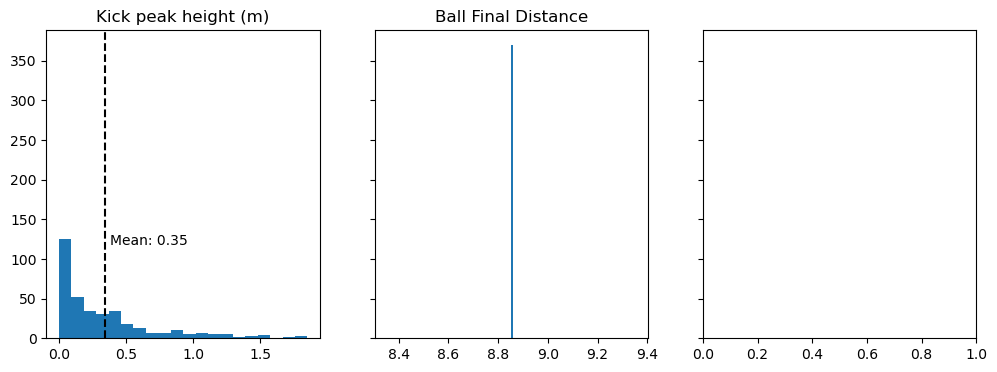

In [44]:
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4), sharey=True)
ax=axes.ravel()

ax[0].hist(kick_heights, bins=20)
ax[0].set_title("Kick peak height (m)")
min_ylim, max_ylim = ax[0].axis()[-2:]
ax[0].axvline(kick_heights.mean(), color='k', linestyle='dashed', linewidth=1.5)
ax[0].text(kick_heights.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(kick_heights.mean()))

ax[1].hist(kick_dists, bins=180)
ax[1].set_title("Ball Final Distance")
min_ylim, max_ylim = ax[1].axis()[-2:]
ax[1].text(ball_x.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(ball_x.mean()))
"""
ball_y = np.array(ball_y)
ax[2].hist(ball_y, bins=180)
ax[2].set_title("Ball position y")
min_ylim, max_ylim = ax[2].axis()[-2:]
ax[2].text(ball_y.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(ball_y.mean()))
"""

plt.show()